In [1]:
import os
import math
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
from PIL import Image
from skimage.metrics import structural_similarity as ssim

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision.transforms import transforms
from torchvision import datasets

device = torch.device("cuda:3" if torch.cuda.is_available() else "cpu")


In [2]:
class SRCNN(nn.Module):
    def __init__(self):
        super(SRCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=9, padding=4);
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, padding=0);
        self.conv3 = nn.Conv2d(32, 1, kernel_size=7, padding=3);

    def forward(self, img):
        out = F.relu(self.conv1(img)) #n_1=64 feature maps
        out = F.relu(self.conv2(out)) #non linear mapping
        out = self.conv3(out)
        return out


torch.Size([64, 1, 9, 9])
SR_with_MSE_loss


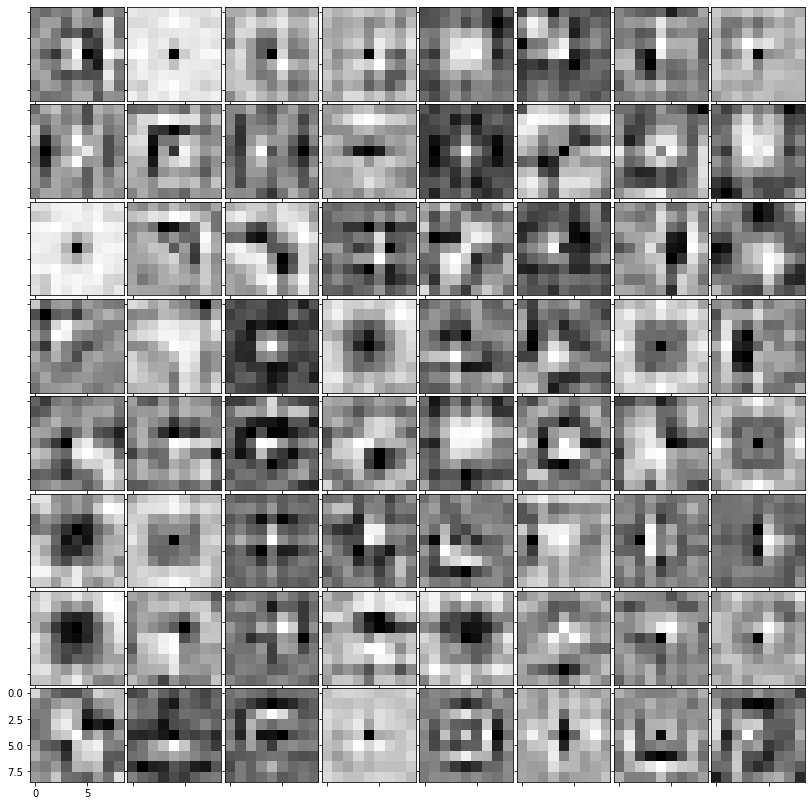

In [4]:
SR_model = SRCNN()

SR_model.load_state_dict(torch.load('../../models/SRCNN_3x.pt'))

for params in SR_model.named_parameters():
    print(params[1].shape)
    break

print("SR_with_MSE_loss")
im = torch.ones((64,3,9,9))
im[:,0,:,:] = params[1].squeeze().detach()
im[:,1,:,:] = params[1].squeeze().detach()
im[:,2,:,:] = params[1].squeeze().detach()
img_grid = torchvision.utils.make_grid(im, nrow=8)

fig = plt.figure(figsize=(55, 55))
fig.subplots_adjust(left=0.05, right=0.95)
grid = ImageGrid(fig, 141,  # similar to subplot(141)
                 nrows_ncols=(8, 8),
                 axes_pad=0.05,
                 label_mode="1",
                 )
for i, ax in enumerate(grid):
    im = ax.imshow(params[1][i].squeeze().detach().numpy(), interpolation="none", cmap='Greys')
